In [1]:
#log add data preprocessing and remove dropout for testing
#Load necessary library
import numpy as np
from scipy import misc
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import h5py
import time
#number of sample
n=100
# import cv2

In [3]:
#This is the function to get the bouding box position
def get_box_data(index, hdf5_data):
    """
    get `left, top, width, height` of each picture
    :param index:
    :param hdf5_data:
    :return:
    """
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(int(hdf5_data[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = hdf5_data['/digitStruct/bbox'][index]
    hdf5_data[box[0]].visititems(print_attrs)
    return meta_data

def get_name(index, hdf5_data):
    name = hdf5_data['/digitStruct/name']
    return ''.join([chr(v[0]) for v in hdf5_data[name[index][0]].value])

In [3]:

# os.chdir('C:\\Users\\cpe\\Documents\\Columbia\\ECBM4060 Neural Network Deep L\\project')
root_dir = os.getcwd()
X_train = []
#     train_label = np.zeros((class_size*n_class)).astype(int)
#     test_data = np.zeros((test_size, 32,32,3)).astype(int)
path = './train'
os.chdir(path)
            
for i in range(1,n+1):
    name = '{}.png'.format(i)
    img = misc.imread(name)
    X_train.append(img)
os.chdir(root_dir)
root_dir

/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


'/home/ecbm4040/ecbm4040project'

(350, 741, 3)


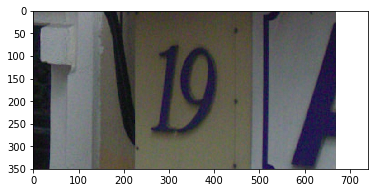

In [4]:
#Original image
plt.imshow(X_train[0])
print(X_train[0].shape)

In [5]:
# Crop image to 54*54*3 format aroud street number

mat_data = h5py.File('./train/digitStruct.mat')
size = mat_data['/digitStruct/name'].size

label_Final = []
Pic_crop_Final = []
for i in range(n):
    Array = np.array(X_train[i])
    pic = get_name(i, mat_data)
    box = get_box_data(i, mat_data)
    label = box['label']
    label_Final.append(''.join(str(int(x%10)) for x in label))

    Test = label_Final[0]

    #Increase location by 30%
    
    H = int(round((max(box['top'])+max(box['height'])) *1.03))
    L = int(round (min(box['left']) *(0.97)))
    if L<0:
        L =0
    T = int(round (min(box['top'])*(0.97)))
    if T<0:
        T = 0
    W = int(round((max (box ['left'])+ max(box['width']))*1.03))
   
    # Combine the boxes together
    Pic_crop = Array [T:H,L:W]

    res_Pic_crop=misc.imresize(Pic_crop,(54,54,3))

    Pic_crop_Final.append(res_Pic_crop)


/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


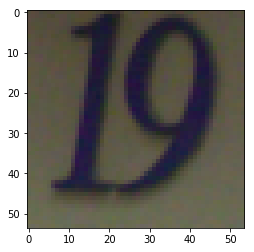

In [6]:
plt.imshow(Pic_crop_Final[0])

In [7]:
label_Final[:10]

['19', '23', '25', '93', '31', '33', '28', '744', '128', '16']

In [8]:
# Encode street number to 5-digit label and length label
label=[]
length=[]
for i in range(len(label_Final)):
    label.append([int(x) for x in label_Final[i]])
    length.append(len(label[-1]))


In [9]:
print(label)
print(length)

[[1, 9], [2, 3], [2, 5], [9, 3], [3, 1], [3, 3], [2, 8], [7, 4, 4], [1, 2, 8], [1, 6], [2, 3], [6, 3], [4, 2], [5, 8], [1, 6], [2, 3], [7, 9], [5, 3], [2, 2, 2], [6, 2], [2], [5, 1, 5], [4, 7], [8, 9], [6, 0, 1], [2, 4], [5, 6], [5, 2], [1, 3, 2], [1, 4], [6, 3, 8], [4, 3], [1, 4], [4, 2], [6], [4, 4], [1, 1], [1, 7], [3, 1], [2, 0], [4, 2], [2, 5, 1], [2, 9], [2, 0, 4], [1, 0], [3, 2, 7], [2, 4], [4, 6], [8, 1, 7], [1, 0, 3], [9, 1], [3, 5], [9, 3], [1, 1], [1, 1, 3, 7], [5, 6], [2, 1, 5], [1, 1], [2], [4, 7], [5], [3, 2], [4, 3], [2, 9], [5, 8], [9, 5], [1, 0], [5, 4, 2], [4, 4], [3, 1], [2, 3, 8, 6], [1, 5], [3], [3, 3], [1, 8], [9, 8], [7, 3, 9], [1, 3, 8], [1, 9, 2, 2], [2, 2], [7, 4], [4, 5], [6, 0], [3], [1, 7], [3, 5], [1, 7], [5], [1, 8], [1, 6, 4], [1, 9, 3], [3, 5], [1, 7], [1, 2], [1, 0, 4, 4], [1, 8], [3, 6], [1, 2, 0], [2], [1, 0, 9]]
[2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 

In [10]:
thats_hot=np.zeros((n,5,11), dtype=int)
for i in range(n):
    for j in range(len(label[i])):
        thats_hot[i][j][label[i][j]]=1
        for j in range(len(label[i]),5):
            thats_hot[i][j][10]=1

In [11]:
print(thats_hot[:3])
print(len(thats_hot))

[[[0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]]
100


In [12]:
#One hot encode length
hot_length = np.zeros((len(length), 7),dtype=int)
hot_length[np.arange(len(length),), length] = 1

In [13]:
print(hot_length[:3])
print(len(hot_length))

[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
100


In [14]:
#Split to train and validation set and convert input to numpy array
n_train = int(n*0.8)
x_train = np.array(Pic_crop_Final[:n_train])
x_val = np.array(Pic_crop_Final[n_train:])
#training label need one-hot encoded format
label_train_hot= np.array(thats_hot[:n_train])
length_train_hot = np.array(hot_length[:n_train])
#validation label is original format
label_val=label[n_train:]
length_val = length[n_train:]
label_train= label[:n_train]
length_train = length[:n_train]

print(type(x_train))
print(label_train_hot.shape)
print(x_train.shape)
print(type(label_val))
print(x_val.shape)
print(label_train[0])
print(length_train[0])
print(label_val)
print(length_val[0])
print(label_train_hot[0])

<class 'numpy.ndarray'>
(80, 5, 11)
(80, 54, 54, 3)
<class 'list'>
(20, 54, 54, 3)
[1, 9]
2
[[7, 4], [4, 5], [6, 0], [3], [1, 7], [3, 5], [1, 7], [5], [1, 8], [1, 6, 4], [1, 9, 3], [3, 5], [1, 7], [1, 2], [1, 0, 4, 4], [1, 8], [3, 6], [1, 2, 0], [2], [1, 0, 9]]
2
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [3]:
#Read data from pickle file
import six.moves.cPickle as pickle
import os
import sys
import gzip
# data_dir = 'C:\\Users\\Mert Ketenci\\Desktop\\train\\train\\'
data_dir=os.getcwd()
output_file = 'trainpkl.gz'
out_path = os.path.join(data_dir, output_file)
f_test = gzip.open(out_path, 'rb')
test_set = pickle.load(f_test)
f_test.close()
# print (test_set)

In [4]:
# print the output
print(test_set['images'].shape)

(33401, 8748)


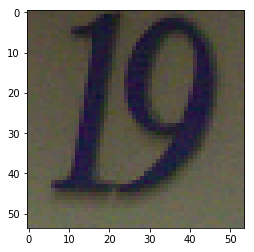

In [5]:
plt.imshow(test_set["images"][0].reshape(54,54,3))

In [6]:
#Create labels and length list
label=[]
length=[]
for i in range(len(test_set["labels"])):
    label.append([int(x) for x in test_set["labels"][i]])
    length.append(len(label[-1]))

In [7]:
#To one hot encoding
Train_no = 33401
thats_hot=np.zeros((Train_no-1,6,11), dtype=int)
for i in range(Train_no-1):
    for j in range(len(label[i])):
        thats_hot[i][j][label[i][j]]=1
        for j in range(len(label[i]),6):
            thats_hot[i][j][10]=1

In [8]:
#One hot encode length
hot_length = np.zeros((len(length), 7),dtype=int)
hot_length[np.arange(len(length),), length] = 1

In [10]:
#Pic_crop_Final = test_set["images"].reshape(Train_no,54,54,3)

In [6]:
#test_set["images"].shape

(33401, 8748)

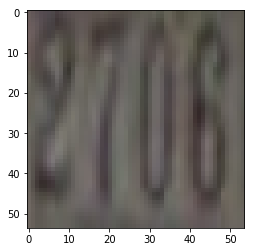

In [12]:
#plt.imshow(Pic_crop_Final[5001])

<class 'numpy.ndarray'>
(26720, 6, 11)
(26720, 54, 54, 3)
<class 'list'>
(6681, 54, 54, 3)
[1, 9]
2
[[2], [3, 9], [1, 7], [6], [2, 4], [3, 1], [5, 4], [7, 0], [2, 0, 7], [1, 1], [1, 6, 7], [7], [8, 8, 6], [1, 0], [2, 1, 7], [1, 7, 9], [4], [6, 5, 5], [6], [4, 0], [2, 7], [4], [5], [6], [2, 8, 8], [6, 1, 7], [4, 0, 0], [7, 2], [4], [1, 6], [5, 5], [4], [1, 1], [1, 1], [2, 8], [1, 8], [1, 7, 7], [4], [2, 7], [1, 0, 9], [3, 5], [2, 7], [1], [4], [5, 4], [4], [1, 5, 6, 5], [2, 1], [1], [6, 3, 1], [5, 8], [3, 2], [4], [5, 6], [9], [6, 0], [2, 7, 2], [2, 0], [3, 5], [1, 7, 2], [2, 4], [1, 4, 3, 0], [1, 0], [6, 8], [3, 2, 1], [1, 8], [1, 0], [6, 0], [4, 3, 1], [1, 3, 9], [1, 6], [2, 4, 3], [7, 7, 8], [6, 5, 0], [6, 1], [6, 3], [2, 4], [1, 2, 7], [7, 6], [3, 7], [3, 9, 0], [6, 9], [3, 9], [6], [1, 3], [3, 3], [1, 0], [5], [4, 8], [3, 1], [6, 1], [5, 7], [1, 2, 1], [6, 0, 5], [3, 9], [2, 5], [2, 1, 9], [4, 5], [5, 1, 3], [2, 1, 7], [1], [1, 0], [3, 2, 8], [2, 9], [1, 5, 0], [7], [5, 5, 6], [3, 

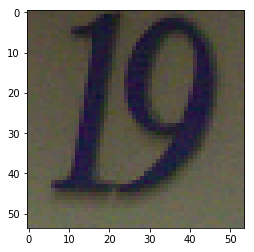

In [9]:
#Split to train and validation set and prepocess data by substracting mean and divided by 255
n=33401
n_train = int(n*0.8)
Pic_crop_Final = test_set["images"]
plt.imshow(Pic_crop_Final[0].reshape([54,54,3]))
x_train = np.array(Pic_crop_Final[:n_train])
x_val = np.array(Pic_crop_Final[n_train:n])
mean_image = np.mean(x_train, axis=0)
x_train = x_train.astype(np.float32) - mean_image.astype(np.float32)
x_val = x_val.astype(np.float32) - mean_image

x_train = x_train.reshape([-1,54,54,3])
x_val = x_val.reshape([-1,54,54,3])

#training label need one-hot encoded format
label_train_hot= np.array(thats_hot[:n_train])
length_train_hot = np.array(hot_length[:n_train])
#validation label is original format
label_val=label[n_train:n]
length_val = length[n_train:n]
label_train= label[:n_train]
length_train = length[:n_train]

print(type(x_train))
print(label_train_hot.shape)
print(x_train.shape)
print(type(label_val))
print(x_val.shape)
print(label_train[0])
print(length_train[0])
print(label_val)
print(length_val[0])
print(label_train_hot[0])
print(x_train[0])

In [12]:
def model (x, length_labels, digits_labels, is_training=True, drop_rate=0.5):
    if is_training == False:
        drop_rate=0


    with tf.variable_scope('hidden1'):
        conv = tf.layers.conv2d(x, filters=48, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden1 = pool  # 27 * 27 * 48
        # print(hidden1.shape)

    with tf.variable_scope('hidden2'):
        conv = tf.layers.conv2d(hidden1, filters=64, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden2 = pool  # 27 * 27 * 64
        # print(hidden2.shape)

    with tf.variable_scope('hidden3'):
        conv = tf.layers.conv2d(hidden2, filters=128, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden3 = pool  # 14 * 14 * 128
        # print(hidden3.shape)

    with tf.variable_scope('hidden4'):
        conv = tf.layers.conv2d(hidden3, filters=160, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden4 = pool  # 14 * 14 *160
        # print(hidden4.shape)

    with tf.variable_scope('hidden5'):
        conv = tf.layers.conv2d(hidden4, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden5 = pool  # 7 * 7 * 192
        # print(hidden5.shape)

    with tf.variable_scope('hidden6'):
        conv = tf.layers.conv2d(hidden5, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden6 = pool  # 7 * 7 * 192
        # print(hidden6.shape)

    with tf.variable_scope('hidden7'):
        conv = tf.layers.conv2d(hidden6, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden7 = pool  # 4 * 4 * 192
        # print(hidden7.shape)

    with tf.variable_scope('hidden8'):
        conv = tf.layers.conv2d(hidden7, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden8 = pool  # 4 * 4 * 192

    flatten = tf.reshape(hidden8, [-1, 4 * 4 * 192])

    with tf.variable_scope('hidden9'):
        dense = tf.layers.dense(flatten, units=3072, activation=tf.nn.relu)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden9 = dropout

    with tf.variable_scope('hidden10'):
        dense = tf.layers.dense(hidden9, units=3072, activation=tf.nn.relu)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden10 = dropout

    with tf.variable_scope('digit_length'):
        dense = tf.layers.dense(hidden10, units=7)
        length = dense

    with tf.variable_scope('digit1'):
        dense = tf.layers.dense(hidden10, units=11)
        digit1 = dense

    with tf.variable_scope('digit2'):
        dense = tf.layers.dense(hidden10, units=11)
        digit2 = dense

    with tf.variable_scope('digit3'):
        dense = tf.layers.dense(hidden10, units=11)
        digit3 = dense

    with tf.variable_scope('digit4'):
        dense = tf.layers.dense(hidden10, units=11)
        digit4 = dense

    with tf.variable_scope('digit5'):
        dense = tf.layers.dense(hidden10, units=11)
        digit5 = dense

    length_logits, digits_logits = length, tf.stack([digit1, digit2, digit3, digit4, digit5], axis=1)

    length_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=length_labels, logits=length_logits))
    digit1_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 0], logits=digits_logits[:, 0, :]))
    digit2_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 1], logits=digits_logits[:, 1, :]))
    digit3_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 2], logits=digits_logits[:, 2, :]))
    digit4_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 3], logits=digits_logits[:, 3, :]))
    digit5_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 4], logits=digits_logits[:, 4, :]))
    loss = length_cross_entropy + digit1_cross_entropy + digit2_cross_entropy + digit3_cross_entropy + digit4_cross_entropy + digit5_cross_entropy
    
    return length_logits, digits_logits, loss

In [13]:
#predict length and 5 digit based on logits 
def predict (length_logits, digits_logits):
    with tf.name_scope('predict'):
        p_l =tf.log(tf.nn.softmax(length_logits,axis=1))
        p_d1=tf.log(tf.nn.softmax(digits_logits[:, 0, :],axis=1))
        p_d2=tf.log(tf.nn.softmax(digits_logits[:, 1, :],axis=1))
        p_d3=tf.log(tf.nn.softmax(digits_logits[:, 2, :],axis=1))
        p_d4=tf.log(tf.nn.softmax(digits_logits[:, 3, :],axis=1))
        p_d5=tf.log(tf.nn.softmax(digits_logits[:, 4, :],axis=1))

        ps0 = tf.add_n([p_l[:,0]])
        ps1= tf.add_n([p_l[:,1],tf.reduce_max(p_d1,axis = 1)])
        ps2= tf.add_n([p_l[:,2],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1)])
        ps3= tf.add_n([p_l[:,3],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1)])
        ps4= tf.add_n([p_l[:,4],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1)])
        ps5= tf.add_n([p_l[:,5],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1),tf.reduce_max(p_d5,axis = 1)])
        ps6= tf.add_n([p_l[:,6],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1),tf.reduce_max(p_d5,axis = 1)])

        ps = tf.stack([ps0,ps1, ps2, ps3, ps4, ps5,ps6], axis=1)
        length_predictions =tf.argmax(ps,axis=1)
        
        d1 = tf.argmax(p_d1, axis=1)
        d2 = tf.argmax(p_d2, axis=1)
        d3 = tf.argmax(p_d3, axis=1)
        d4 = tf.argmax(p_d4, axis=1)
        d5 = tf.argmax(p_d5, axis=1)
        digits_prediction = tf.stack([d1, d2, d3, d4, d5], axis=1)

    return length_predictions,digits_prediction

In [14]:
# Generate predicted sequence and calcualate accuracy
def evaluate (length_predictions, digits_predictions, length_label, label):

# Input:  length_label: list of length n
#         label: list of n list, each list is the individual digit
#         digits_predictions: numpy array of predicted 5 digits for each sample

    output_list = []
    num_error = 0
    for i in range(len(length_label)):
        str_pred = np.ndarray.tolist(digits_predictions[i,:length_label[i]])
        output_list.append(str_pred)
        if str_pred != label[i]:
            num_error+=1
    accuracy = (1-num_error/len(length_label))*100
    return output_list, accuracy

In [ ]:
#Training
saving_directory = './Desktop/Train/'

tf.reset_default_graph()
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=(None,54,54,3))
    length_labels = tf.placeholder(tf.int64, shape=(None,None,))
    digits_labels =  tf.placeholder(tf.int64, shape=(None,None,None))
    is_training = tf.placeholder(tf.bool, name='is_training')
num_train = x_train.shape[0]
batch_size = 32
epoches = 200
num_batch = num_train//batch_size
length_logits, digits_logits, loss = model(x, length_labels, digits_labels)

train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

length_predictions, digits_predictions = predict(length_logits, digits_logits)
iter_total = 0
best_acc = 0
cur_model_name = 'SVHN_{}'.format(int(time.time()))

with tf.Session() as sess:
#     merge = tf.summary.merge_all()
#     writer = tf.summary.FileWriter("log/{}".format(cur_model_name), sess.graph)
    sess.run(tf.initialize_all_variables())
    saver = tf.train.Saver()
    
    for e in range(epoches):
        print("epoch {} ".format(e + 1))
        for i in range(num_batch):
            iter_total += 1
            choice=np.random.choice(num_train, size=batch_size, replace=False)
            batch_x, batch_digits, batch_length = x_train[choice], thats_hot[choice], hot_length[choice]
            _, length_logits_tf, digits_logits_tf, loss_tf = sess.run([train_step,length_logits, digits_logits, loss],
                                                                      feed_dict={x:batch_x , 
                                                                                 length_labels:batch_length,
                                                                                 digits_labels:batch_digits,
                                                                                 is_training: True})
            

            if iter_total % 10 == 0:
                
            # do validation
#                 length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_train,is_training: False})
#                 pred_str, valid_acc = evaluate(length_tf, digit_tf, length_train, label_train)
                length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_val})
                pred_str, valid_acc = evaluate(length_tf, digit_tf, length_val, label_val)
                print('{} batch training loss: {} validation accuracy : {}%'.format(i,loss_tf,valid_acc))

#                     # save the merge result summary
#                 writer.add_summary(merge_result, iter_total)
                # when achieve the best validation accuracy, we store the model paramters
                if valid_acc > best_acc:
                    best_acc = valid_acc
                    print('Best validation accuracy: {}%'.format(best_acc))
                
                    saver.save(sess, 'model/{}'.format(cur_model_name))
print("Traning ends. The best valid accuracy is {}. Model named {}.".format(best_acc, cur_model_name))



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 1 
9 batch training loss: 7.701284408569336 validation accuracy : 1.3321359077982375%
Best validation accuracy: 1.3321359077982375%
19 batch training loss: 8.361516952514648 validation accuracy : 1.8859452177817704%
Best validation accuracy: 1.8859452177817704%
29 batch training loss: 6.97459602355957 validation accuracy : 1.856009579404283%
39 batch training loss: 6.948408603668213 validation accuracy : 2.260140697500379%
Best validation accuracy: 2.260140697500379%
49 batch training loss: 7.291728973388672 validation accuracy : 2.260140697500379%
59 batch training loss: 7.721559047698975 validation accuracy : 3.622212243676093%
Best validation accuracy: 3.622212243676093%
69 batch training loss: 6.784331798553467 val

809 batch training loss: 4.3083271980285645 validation accuracy : 10.04340667564736%
819 batch training loss: 4.551947116851807 validation accuracy : 11.345606945068099%
829 batch training loss: 5.3121867179870605 validation accuracy : 12.752581948810061%
Best validation accuracy: 12.752581948810061%
epoch 2 
4 batch training loss: 4.903162956237793 validation accuracy : 10.806765454273314%
14 batch training loss: 4.629426956176758 validation accuracy : 13.875168387965875%
Best validation accuracy: 13.875168387965875%
24 batch training loss: 3.9808199405670166 validation accuracy : 12.348450830713965%
34 batch training loss: 4.203746318817139 validation accuracy : 14.937883550366715%
Best validation accuracy: 14.937883550366715%
44 batch training loss: 5.3152923583984375 validation accuracy : 16.09040562790002%
Best validation accuracy: 16.09040562790002%
54 batch training loss: 4.649796962738037 validation accuracy : 13.141745247717406%
64 batch training loss: 4.672933578491211 valida

794 batch training loss: 4.304171085357666 validation accuracy : 19.26358329591379%
804 batch training loss: 3.5458085536956787 validation accuracy : 20.490944469390815%
814 batch training loss: 3.18703556060791 validation accuracy : 29.441700344259846%
824 batch training loss: 3.8023030757904053 validation accuracy : 30.160155665319564%
834 batch training loss: 3.447434663772583 validation accuracy : 27.88504714863045%
epoch 3 
9 batch training loss: 3.7447195053100586 validation accuracy : 26.163747941924864%
19 batch training loss: 3.6261720657348633 validation accuracy : 34.26133812303548%
29 batch training loss: 4.002325534820557 validation accuracy : 33.587786259541986%
39 batch training loss: 4.10233736038208 validation accuracy : 29.75602454722347%
49 batch training loss: 2.8217358589172363 validation accuracy : 35.14443945517138%
59 batch training loss: 2.795658588409424 validation accuracy : 35.62340966921119%
69 batch training loss: 3.6821651458740234 validation accuracy : 3

14 batch training loss: 1.8675616979599 validation accuracy : 55.05163897620117%
Best validation accuracy: 55.05163897620117%
24 batch training loss: 2.313749074935913 validation accuracy : 56.45861397994312%
Best validation accuracy: 56.45861397994312%
34 batch training loss: 1.3799846172332764 validation accuracy : 53.91408471785661%
44 batch training loss: 2.2712669372558594 validation accuracy : 56.20416105373447%
54 batch training loss: 2.207395076751709 validation accuracy : 54.572668762161356%
64 batch training loss: 1.992092251777649 validation accuracy : 53.674599610836694%
74 batch training loss: 1.9553860425949097 validation accuracy : 50.0523873671606%
84 batch training loss: 1.8672157526016235 validation accuracy : 52.53704535249214%
94 batch training loss: 2.7690463066101074 validation accuracy : 54.88699296512498%
104 batch training loss: 2.2733261585235596 validation accuracy : 54.99176769944619%
114 batch training loss: 2.5861425399780273 validation accuracy : 55.09654

109 batch training loss: 2.4893035888671875 validation accuracy : 59.70663074390061%
119 batch training loss: 1.4417611360549927 validation accuracy : 59.36237090255949%
129 batch training loss: 1.6223182678222656 validation accuracy : 61.1585092052088%
139 batch training loss: 2.285115957260132 validation accuracy : 57.49139350396647%
149 batch training loss: 1.8741528987884521 validation accuracy : 58.59901212393355%
159 batch training loss: 1.8462390899658203 validation accuracy : 60.08082622361922%
169 batch training loss: 2.7177650928497314 validation accuracy : 61.90690016464602%
179 batch training loss: 1.335852026939392 validation accuracy : 60.82921718305643%
189 batch training loss: 1.436920166015625 validation accuracy : 60.544828618470284%
199 batch training loss: 2.0243844985961914 validation accuracy : 62.10148181409969%
Best validation accuracy: 62.10148181409969%
209 batch training loss: 1.438090443611145 validation accuracy : 61.54767250411615%
219 batch training loss:

214 batch training loss: 1.3405094146728516 validation accuracy : 63.2240682532555%
224 batch training loss: 0.5453993678092957 validation accuracy : 64.76575362969615%
234 batch training loss: 1.314831018447876 validation accuracy : 63.61323155216285%
244 batch training loss: 2.1553869247436523 validation accuracy : 64.34665469241132%
254 batch training loss: 1.5664321184158325 validation accuracy : 64.70588235294117%
264 batch training loss: 2.5849287509918213 validation accuracy : 63.52342463703038%
274 batch training loss: 1.4702175855636597 validation accuracy : 65.2896273013022%
284 batch training loss: 2.5772430896759033 validation accuracy : 64.24187995809011%
294 batch training loss: 1.9203754663467407 validation accuracy : 63.41864990270918%
304 batch training loss: 2.6704025268554688 validation accuracy : 64.07723394701392%
314 batch training loss: 0.978200376033783 validation accuracy : 59.10791797635084%
324 batch training loss: 1.7352824211120605 validation accuracy : 61.

329 batch training loss: 1.2592302560806274 validation accuracy : 67.69944619069001%
339 batch training loss: 1.2899130582809448 validation accuracy : 67.93893129770993%
349 batch training loss: 0.9166731238365173 validation accuracy : 67.44499326448137%
359 batch training loss: 1.6166527271270752 validation accuracy : 67.87906002095494%
369 batch training loss: 1.7078756093978882 validation accuracy : 66.0380182607394%
379 batch training loss: 1.3687398433685303 validation accuracy : 67.01092650800778%
389 batch training loss: 1.6633931398391724 validation accuracy : 67.40008980691513%
399 batch training loss: 2.069441318511963 validation accuracy : 65.21478820535849%
409 batch training loss: 1.8878432512283325 validation accuracy : 65.33453075886844%
419 batch training loss: 1.5335571765899658 validation accuracy : 66.69660230504415%
429 batch training loss: 1.4216418266296387 validation accuracy : 68.22331986229607%
439 batch training loss: 1.0798449516296387 validation accuracy : 6

454 batch training loss: 2.146895408630371 validation accuracy : 70.76784912438258%
464 batch training loss: 1.7303770780563354 validation accuracy : 68.52267624607094%
474 batch training loss: 0.6763145923614502 validation accuracy : 68.67235443795838%
484 batch training loss: 0.9634332060813904 validation accuracy : 69.00164646011075%
494 batch training loss: 1.6362292766571045 validation accuracy : 68.70229007633588%
504 batch training loss: 1.299235224723816 validation accuracy : 67.84912438257746%
514 batch training loss: 1.0390433073043823 validation accuracy : 69.80990869630294%
524 batch training loss: 0.953176736831665 validation accuracy : 70.55829965574017%
534 batch training loss: 0.9056298136711121 validation accuracy : 70.34875018709774%
544 batch training loss: 1.2502955198287964 validation accuracy : 69.54048795090554%
554 batch training loss: 0.8754903674125671 validation accuracy : 69.9595868881904%
564 batch training loss: 0.32902172207832336 validation accuracy : 69

569 batch training loss: 1.0126419067382812 validation accuracy : 70.87262385870379%
579 batch training loss: 0.8063551187515259 validation accuracy : 71.63598263732975%
589 batch training loss: 0.4695972502231598 validation accuracy : 71.41146534949858%
599 batch training loss: 1.0495327711105347 validation accuracy : 71.81559646759467%
609 batch training loss: 1.0127381086349487 validation accuracy : 72.18979194731328%
Best validation accuracy: 72.18979194731328%
619 batch training loss: 0.7421888113021851 validation accuracy : 70.40862146385271%
629 batch training loss: 1.5275031328201294 validation accuracy : 69.00164646011075%
639 batch training loss: 0.862037181854248 validation accuracy : 70.61817093249513%
649 batch training loss: 0.9304123520851135 validation accuracy : 70.79778476276006%
659 batch training loss: 0.8845204710960388 validation accuracy : 69.16629247118695%
669 batch training loss: 1.156495451927185 validation accuracy : 72.11495285136955%
679 batch training los

694 batch training loss: 1.0607054233551025 validation accuracy : 71.24681933842238%
704 batch training loss: 1.070776104927063 validation accuracy : 70.96243077383626%
714 batch training loss: 1.3152576684951782 validation accuracy : 72.20475976650202%
724 batch training loss: 0.9968894124031067 validation accuracy : 71.56114354138602%
734 batch training loss: 0.42350274324417114 validation accuracy : 71.08217332734621%
744 batch training loss: 0.7638000249862671 validation accuracy : 72.5041161502769%
754 batch training loss: 0.5152567625045776 validation accuracy : 70.88759167789253%
764 batch training loss: 1.2206887006759644 validation accuracy : 72.01017811704835%
774 batch training loss: 0.6701703667640686 validation accuracy : 72.60889088459813%
784 batch training loss: 0.5596205592155457 validation accuracy : 71.59107917976351%
794 batch training loss: 1.2776744365692139 validation accuracy : 72.5340517886544%
804 batch training loss: 1.635090708732605 validation accuracy : 72

809 batch training loss: 1.1847574710845947 validation accuracy : 73.77638078132016%
Best validation accuracy: 73.77638078132016%
819 batch training loss: 1.0581815242767334 validation accuracy : 73.4171531207903%
829 batch training loss: 0.7035420536994934 validation accuracy : 73.02798982188294%
epoch 12 
4 batch training loss: 0.8799248933792114 validation accuracy : 73.86618769645264%
Best validation accuracy: 73.86618769645264%
14 batch training loss: 0.9692820310592651 validation accuracy : 73.11779673701541%
24 batch training loss: 0.6058133244514465 validation accuracy : 71.17198024247867%
34 batch training loss: 0.6101052165031433 validation accuracy : 72.68372998054183%
44 batch training loss: 0.8856425285339355 validation accuracy : 72.65379434216435%
54 batch training loss: 0.9017146229743958 validation accuracy : 71.93533902110462%
64 batch training loss: 1.2580171823501587 validation accuracy : 71.4863044454423%
74 batch training loss: 0.8429240584373474 validation accura

89 batch training loss: 0.7119484543800354 validation accuracy : 72.75856907648556%
99 batch training loss: 0.6148009300231934 validation accuracy : 71.71082173327346%
109 batch training loss: 1.167871356010437 validation accuracy : 71.98024247867085%
119 batch training loss: 0.9211357831954956 validation accuracy : 72.62385870378687%
129 batch training loss: 0.3644416630268097 validation accuracy : 71.53120790300854%
139 batch training loss: 1.0732390880584717 validation accuracy : 71.08217332734621%
149 batch training loss: 0.6582198143005371 validation accuracy : 72.5340517886544%
159 batch training loss: 0.4267447888851166 validation accuracy : 72.86334381080677%
169 batch training loss: 0.4048425555229187 validation accuracy : 73.31237838646909%
179 batch training loss: 0.7399099469184875 validation accuracy : 71.44140098787607%
189 batch training loss: 1.0797926187515259 validation accuracy : 73.07289327944919%
199 batch training loss: 0.8409491777420044 validation accuracy : 70.

224 batch training loss: 0.6521534323692322 validation accuracy : 72.57895524622062%
234 batch training loss: 0.7646633386611938 validation accuracy : 72.3694057775782%
244 batch training loss: 1.214516043663025 validation accuracy : 73.0429576410717%
254 batch training loss: 0.43937215209007263 validation accuracy : 72.80347253405179%
264 batch training loss: 0.6379485130310059 validation accuracy : 73.31237838646909%
274 batch training loss: 0.9124341607093811 validation accuracy : 72.41430923514444%
284 batch training loss: 1.0847880840301514 validation accuracy : 71.84553210597215%
294 batch training loss: 0.4795200228691101 validation accuracy : 73.25250710971412%
304 batch training loss: 1.2629426717758179 validation accuracy : 73.98593024996258%
314 batch training loss: 1.0565944910049438 validation accuracy : 73.37224966322407%
324 batch training loss: 0.44006121158599854 validation accuracy : 73.61173477024397%
334 batch training loss: 0.42173469066619873 validation accuracy :

In [ ]:
#Training - Recover
saving_directory = './Desktop/Train/'

tf.reset_default_graph()
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=(None,54,54,3))
    length_labels = tf.placeholder(tf.int64, shape=(None,None,))
    digits_labels =  tf.placeholder(tf.int64, shape=(None,None,None))
    is_training = tf.placeholder(tf.bool, name='is_training')
num_train = x_train.shape[0]
batch_size = 32
epoches = 50
num_batch = num_train//batch_size
length_logits, digits_logits, loss = model(x, length_labels, digits_labels)

train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

length_predictions, digits_predictions = predict(length_logits, digits_logits)
iter_total = 0
best_acc = 0
cur_model_name = 'SVHN_{}'.format(int(time.time()))

with tf.Session() as sess:
#     merge = tf.summary.merge_all()
#     writer = tf.summary.FileWriter("log/{}".format(cur_model_name), sess.graph)
    sess.run(tf.initialize_all_variables())
    new_saver = tf.train.Saver()
    pre_trained_model = './model/SVHN_1544806657'
    new_saver.restore(sess, pre_trained_model)
    for e in range(epoches):
        print("epoch {} ".format(e + 1))
        for i in range(num_batch):
            iter_total += 1
            choice=np.random.choice(num_train, size=batch_size, replace=False)
            batch_x, batch_digits, batch_length = x_train[choice], thats_hot[choice], hot_length[choice]
            _, length_logits_tf, digits_logits_tf, loss_tf = sess.run([train_step,length_logits, digits_logits, loss],
                                                                      feed_dict={x:batch_x , 
                                                                                 length_labels:batch_length,
                                                                                 digits_labels:batch_digits,
                                                                                 is_training: True})
            

            if iter_total % 10 == 0:
                
            # do validation
#                 length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_train,is_training: False})
#                 pred_str, valid_acc = evaluate(length_tf, digit_tf, length_train, label_train)
                length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_val})
                pred_str, valid_acc = evaluate(length_tf, digit_tf, length_val, label_val)
                print('{} batch training loss: {} validation accuracy : {}%'.format(i,loss_tf,valid_acc))

#                     # save the merge result summary
#                 writer.add_summary(merge_result, iter_total)
                # when achieve the best validation accuracy, we store the model paramters
                if valid_acc > best_acc:
                    best_acc = valid_acc
                    print('Best validation accuracy: {}%'.format(best_acc))
                
                    saver.save(sess, 'model/{}'.format(cur_model_name))
print("Traning ends. The best valid accuracy is {}. Model named {}.".format(best_acc, cur_model_name))



INFO:tensorflow:Restoring parameters from ./model/SVHN_1544806657
epoch 1 
9 batch training loss: 0.9501141309738159 validation accuracy : 74.28528663373746%
Best validation accuracy: 74.28528663373746%
19 batch training loss: 0.4132407009601593 validation accuracy : 71.80062864840593%
29 batch training loss: 0.9291168451309204 validation accuracy : 73.61173477024397%
39 batch training loss: 0.603221595287323 validation accuracy : 72.59392306540937%
49 batch training loss: 0.9590442180633545 validation accuracy : 72.0251459362371%
59 batch training loss: 0.757101833820343 validation accuracy : 72.33947013920073%
69 batch training loss: 0.5109363794326782 validation accuracy : 72.96811854512796%
79 batch training loss: 0.6737262010574341 validation accuracy : 73.53689567430027%
89 batch training loss: 1.0193699598312378 validation accuracy : 73.79134860050891%
99 batch training loss: 0.9003763794898987 validation accuracy : 73.52192785511151%
109 batch training loss: 1.0338481664657593 

114 batch training loss: 0.730060875415802 validation accuracy : 73.59676695105523%
124 batch training loss: 0.567030131816864 validation accuracy : 73.88115551564137%
134 batch training loss: 0.38492169976234436 validation accuracy : 73.16270019458165%
144 batch training loss: 0.38937070965766907 validation accuracy : 72.9381829067505%
154 batch training loss: 1.289894938468933 validation accuracy : 73.08786109863793%
164 batch training loss: 0.6993446946144104 validation accuracy : 72.78850471486305%
174 batch training loss: 0.32772165536880493 validation accuracy : 72.86334381080677%
184 batch training loss: 0.9637702703475952 validation accuracy : 73.79134860050891%
194 batch training loss: 1.0624775886535645 validation accuracy : 72.27959886244575%
204 batch training loss: 0.4158065617084503 validation accuracy : 73.61173477024397%
214 batch training loss: 1.268644094467163 validation accuracy : 73.19263583295914%
224 batch training loss: 0.9158674478530884 validation accuracy : 7

239 batch training loss: 1.4325625896453857 validation accuracy : 72.87831162999551%
249 batch training loss: 0.5963833928108215 validation accuracy : 72.68372998054183%
259 batch training loss: 0.15219540894031525 validation accuracy : 74.09070498428379%
269 batch training loss: 0.2310439944267273 validation accuracy : 74.00089806915133%
279 batch training loss: 0.3577030897140503 validation accuracy : 73.11779673701541%
289 batch training loss: 0.4355948269367218 validation accuracy : 73.80631641969765%
299 batch training loss: 0.2374623864889145 validation accuracy : 72.09998503218081%
309 batch training loss: 0.5981503129005432 validation accuracy : 73.37224966322407%
319 batch training loss: 1.2287756204605103 validation accuracy : 72.99805418350547%
329 batch training loss: 0.43607303500175476 validation accuracy : 73.53689567430027%
339 batch training loss: 1.2761318683624268 validation accuracy : 73.31237838646909%
349 batch training loss: 0.792732298374176 validation accuracy 

354 batch training loss: 0.6285140514373779 validation accuracy : 73.71650950456518%
364 batch training loss: 0.8447360992431641 validation accuracy : 73.0130220026942%
374 batch training loss: 0.9009953141212463 validation accuracy : 72.41430923514444%
384 batch training loss: 0.7959468960762024 validation accuracy : 73.64167040862147%
394 batch training loss: 0.4978753328323364 validation accuracy : 72.60889088459813%
404 batch training loss: 0.7220982909202576 validation accuracy : 73.17766801377039%
414 batch training loss: 0.34996652603149414 validation accuracy : 73.0429576410717%
424 batch training loss: 0.9631853103637695 validation accuracy : 74.24038317617124%
434 batch training loss: 0.713302493095398 validation accuracy : 74.28528663373746%
444 batch training loss: 0.5828367471694946 validation accuracy : 74.39006136805868%
454 batch training loss: 0.9409728050231934 validation accuracy : 74.21044753779374%
464 batch training loss: 0.2307010143995285 validation accuracy : 7

489 batch training loss: 0.6267651319503784 validation accuracy : 74.50980392156863%
499 batch training loss: 0.8851884007453918 validation accuracy : 74.86903158209849%
509 batch training loss: 0.6044023633003235 validation accuracy : 72.51908396946564%
519 batch training loss: 0.5606266260147095 validation accuracy : 69.94461906900165%
529 batch training loss: 1.1542540788650513 validation accuracy : 70.51339619817392%
539 batch training loss: 1.2338511943817139 validation accuracy : 70.66307439006137%
549 batch training loss: 0.6549280285835266 validation accuracy : 71.41146534949858%
559 batch training loss: 0.573529064655304 validation accuracy : 72.09998503218081%
569 batch training loss: 0.6034455299377441 validation accuracy : 72.44424487352192%
579 batch training loss: 2.1869146823883057 validation accuracy : 73.0429576410717%
589 batch training loss: 1.0774449110031128 validation accuracy : 73.46205657835654%
599 batch training loss: 1.0958656072616577 validation accuracy : 7

In [2]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add()
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>" % size
    return strip_def


def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph' + str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1000px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [4]:
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./model/SVHN_1544815283.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [5]:
##Load x_test data
import six.moves.cPickle as pickle
import os
import sys
import gzip

data_dir=os.getcwd()
output_file = 'testpkl.gz'
out_path = os.path.join(data_dir, output_file)
f_test = gzip.open(out_path, 'rb')
test_set = pickle.load(f_test)
f_test.close()

In [6]:
#Create labels and length list
label_test=[]
length_test=[]
for i in range(len(test_set["labels"])):
    label_test.append([int(x) for x in test_set["labels"][i]])
    length_test.append(len(label_test[-1]))

In [ ]:
# #To one hot encoding
# Train_no = test_set["images"].shape[0]
# thats_hot=np.zeros((Train_no-1,6,11), dtype=int)
# for i in range(Train_no-1):
#     for j in range(len(label_test[i])):
#         thats_hot[i][j][label[i][j]]=1
#         for j in range(len(label[i]),6):
#             thats_hot[i][j][10]=1

In [7]:
x_test = test_set["images"]

In [8]:
mean_image = np.mean(x_test, axis=0)
x_test = x_test.astype(np.float32) - mean_image.astype(np.float32)

In [9]:
#reshape
n =13067
x_test= x_test.reshape(n,54,54,3)


In [14]:

# x_test1 = x_test[:2000]
# label_test1 = label_test[:2000]
# length_test1 = length_test[:2000]

In [10]:
def Test(x_test,length_val,label_val,pre_trained_model):
    tf.reset_default_graph()


    # define the variables and parameter needed during training
    with tf.name_scope('inputs'):
        x = tf.placeholder(tf.float32, shape=(None,54,54,3))
        length_labels = tf.placeholder(tf.int64, shape=(None,None,))
        digits_labels =  tf.placeholder(tf.int64, shape=(None,None,None))
        is_training = tf.placeholder(tf.bool, name='is_training')

    length_logits_test, digits_logits_test, loss_test = model(x, length_labels, digits_labels, 
                                                           is_training=False, drop_rate=0.5)

    length_predictions, digits_predictions = predict(length_logits_test, digits_logits_test)

    with tf.Session() as sess:

        new_saver = tf.train.Saver()
        new_saver.restore(sess, pre_trained_model)

        length_test, digit_test = sess.run([length_predictions, digits_predictions],feed_dict={x:x_test})
        pred_str_test, valid_acc_test = evaluate(length_test, digit_test, length_val, label_val)
        

    return valid_acc_test

In [15]:
num_batches = 100
num_iterates = x_test.shape[0]//num_batches
tot_acc = []
for i in range (num_iterates):
    x_test_new = x_test[i*num_batches:num_batches*(i+1)]
    length_test_new = length_test[i*num_batches:num_batches*(i+1)]
    label_test_new = label_test[i*num_batches:num_batches*(i+1)]
    acc = Test(x_test_new,length_test_new,label_test_new,pre_trained_model="./model/SVHN_1544815283")
    tot_acc.append(acc)
tot = sum(tot_acc)/len(tot_acc)

print( ": Total Testing Accuracy : {}%".format(tot))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:

INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
INFO:tensorflow:Restoring parameters from ./model/SVHN_1544815283
: Total Testing Accuracy : 75.97692307692307%
